<a href="https://colab.research.google.com/github/orbenishay/pandas-project/blob/master/Bicycle_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bay Area Bike Rental** 
![alt text](https://media-cdn.tripadvisor.com/media/attractions-splice-spp-540x360/07/32/ba/20.jpg)

In [0]:
# Import modules
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import datetime
import calendar

## **Background**
the database includes bike rental data in San Francisco and the Bay area.<h5>
The dataset consists of 4 tables: trips (95K rental entries) in addition to dimensions of bikes, station and weather.<h5>
We cleanned the tables from unnecessary columns that we could calculate in the notebook, in order to speed the data load.


## Import Dataset

In [7]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving bikes.csv to bikes.csv


# Station DataFrame

In [33]:
df_station = pd.read_csv("station.csv", index_col = 'id')
df_station.head()

,station_name,lat,long,dock_count,city,installation_date
id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,24,San Jose,08/06/2013
3,San Jose Civic Center,37.330698,-121.888979,30,San Jose,08/05/2013
4,Santa Clara at Almaden,37.333988,-121.894902,27,San Jose,08/06/2013
5,Adobe on Almaden,37.331415,-121.893200,16,San Jose,08/05/2013
6,San Pedro Square,37.336721,-121.894074,28,San Jose,08/07/2013


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


Text(0.5, 1.0, 'Proportion of # stations per ciry')

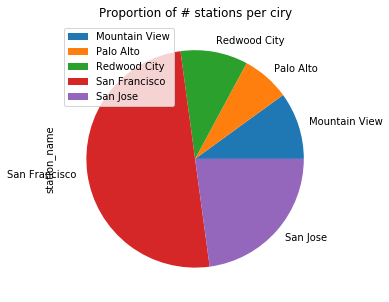

In [22]:
df_station.groupby('city')['station_name'].count().plot.pie(figsize=(8, 5))
plt.legend(('Mountain View', 'Palo Alto', 'Redwood City','San Francisco','San Jose'),loc='left')
plt.title('Proportion of # stations per ciry')

dock_count                                                    
                   count       mean       std   min    25%   50%   75%   max
city                                                                        
Mountain View        7.0  11.000000  3.162278   5.0  10.00  12.0  12.5  15.0
Palo Alto            5.0  29.000000  8.916277  20.0  23.00  28.0  31.0  43.0
Redwood City         7.0  19.428571  5.380742  11.0  17.00  19.0  22.5  27.0
San Francisco       35.0  29.714286  8.827002  15.0  22.50  30.0  36.5  43.0
San Jose            16.0  22.937500  4.343098  16.0  19.75  22.0  27.0  30.0

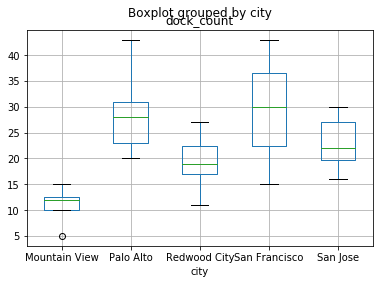

In [38]:
df_station.boxplot(by='city', column= 'dock_count')
df_station.drop(columns = ['lat', 'long']).groupby('city').describe()

## Weather DataFrame

In [0]:
df_weather = pd.read_csv("weather.csv", parse_dates=['date'])
df_weather['mean_temperature_c'] = (df_weather['mean_temperature_f'] - 32)*(5/9)
df_weather['date_month'] = pd.DatetimeIndex(df_weather['date']).month
df_weather['date_day'] = pd.DatetimeIndex(df_weather['date']).day
df_weather['month'] = df_weather['date_month'].apply(lambda x: calendar.month_abbr[x])
df_weather.head()

,station_name,lat,long,dock_count,city,installation_date
id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,08/06/2013
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,08/05/2013
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,08/06/2013
5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,08/05/2013
6,San Pedro Square,37.336721,-121.894074,15,San Jose,08/07/2013


In [0]:
df_weather.groupby('date_month',)['mean_temperature_c'].mean().plot.bar()
df_weather_agg=df_weather.groupby(['date_month']).agg({'mean_temperature_c': 'mean', 'mean_wind_speed_kph': 'mean', 'mean_humidity': 'mean'})

df_weather_agg.plot(kind='bar', stacked=False, figsize=(8, 5), subplots=True)

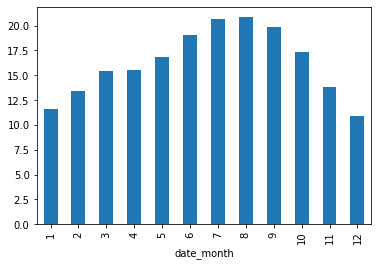

In [0]:
df_weather.groupby('date_month')['mean_temperature_c'].mean().plot.bar()

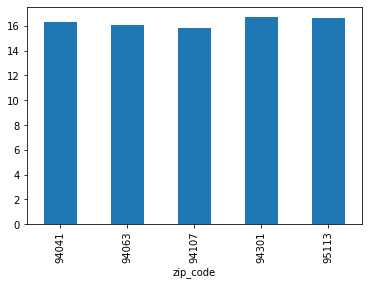

In [0]:
df_weather.groupby('zip_code')['mean_temperature_c'].mean().plot.bar()

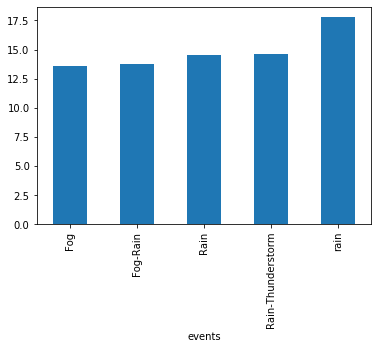

In [0]:
df_weather.groupby('events')['mean_temperature_c'].mean().plot.bar()

## Trip DataFrame

In [0]:
df_trip = pd.read_csv("trip.csv", parse_dates=True)
df_trip['start_date'] = pd.to_datetime(df_trip['start_date'], errors='coerce', dayfirst=True)
df_trip['end_date'] = pd.to_datetime(df_trip['end_date'], errors='coerce', dayfirst=True)
df_trip['date_day']=df_trip['start_date'].dt.date
df_trip['duration']=df_trip['end_date']-df_trip['start_date']
df_trip['start_date'] = df_trip['start_date'].dt.date
df_trip.head()

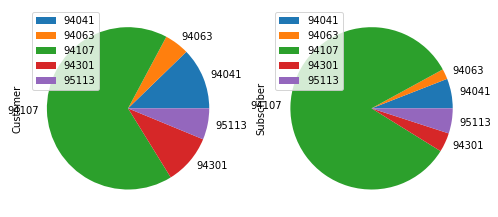

In [0]:
df_trip_subscription = df_trip.groupby(['subscription_type', 'zip_code'])['id'].count().unstack(0).plot.pie(subplots=True, figsize=(8,8))

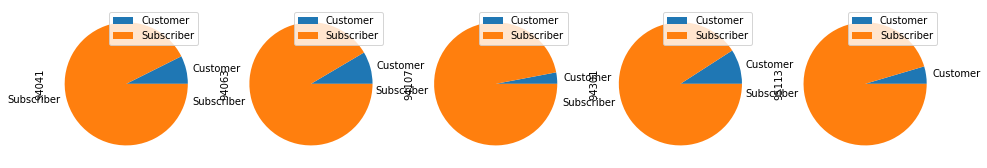

In [0]:
df_trip_zipcode = df_trip.groupby(['subscription_type', 'zip_code'])['id'].count().unstack(1).plot.pie(subplots=True, figsize=(16,16))

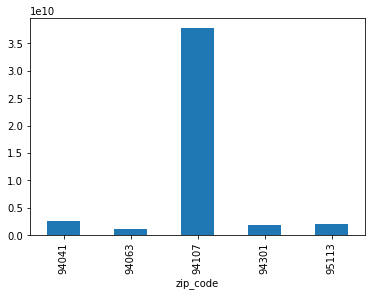

In [0]:
df_trip.groupby('zip_code')['id'].sum().plot.bar()

## Bikes DataFrame

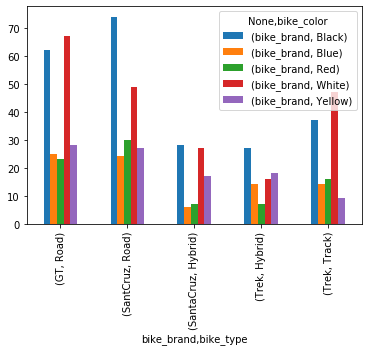

In [0]:
df_bikes = pd.read_csv("bikes.csv", index_col = 'bike_id')

plot = df_bikes.groupby(['bike_brand', 'bike_type', 'bike_color']).agg({'bike_brand':'count'}).unstack(2).plot.bar()

## **Merge**

We merged all the tables into one big table

In [0]:
df_trip_weather = df_trip.merge(df_weather, how='left', left_on = ['zip_code', 'date_day'], right_on=['zip_code','date'])
df_trip_weather_station = df_trip_weather.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
df_all = df_trip_weather_station.merge(df_bikes, how='left', left_on = 'bike_id', right_on='bike_id')
df_all.head()

# Most popular stations by city

* Most of the stations are in San Francisco
* The most popular station is in San Fracisco: 'Mountain View City Hal'

In [0]:
df_station_count = df_trip.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
df_station_count.head()

,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,date_day,duration,station_name,lat,long,dock_count,city,installation_date
0,35,35,247,Customer,94301,2013-11-30 13:29:00,08/12/2013 22:06,2013-12-08 22:49:00,2013-11-30,8 days 09:20:00,University and Emerson,37.444521,-122.163093,11,Palo Alto,8/15/2013
1,2,12,653,Subscriber,94041,2013-12-18 09:16:00,25/12/2013 13:18,2013-12-25 13:29:00,2013-12-18,7 days 04:13:00,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,08/06/2013
2,27,27,13,Customer,94041,2014-07-15 16:23:00,19/07/2014 17:18,2014-07-19 17:45:00,2014-07-15,4 days 01:22:00,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
3,27,27,126,Customer,94041,2014-07-15 16:23:00,19/07/2014 08:47,2014-07-19 09:21:00,2014-07-15,3 days 16:58:00,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
4,14,6,650,Customer,95113,2013-09-15 00:37:00,17/09/2013 18:28,2013-09-17 19:04:00,2013-09-15,2 days 18:27:00,Arena Green / SAP Center,37.332692,-121.900084,19,San Jose,08/05/2013


In [0]:
#df_station_count.groupby(['station_name', 'city']).agg({'station_name':'count'}).plot.bar(figsize=(12,8))

In [0]:
station_by_city = df_station_count.groupby(['station_name', 'city']).agg({'station_name':'count'}).unstack(1)

station_by_city

station_name  ...         
city                                          Mountain View  ... San Jose
station_name                                                 ...         
2nd at Folsom                                           NaN  ...      NaN
2nd at South Park                                       NaN  ...      NaN
2nd at Townsend                                         NaN  ...      NaN
5th at Howard                                           NaN  ...      NaN
Adobe on Almaden                                        NaN  ...     65.0
...                                                     ...  ...      ...
Temporary Transbay Terminal (Howard at Beale)           NaN  ...      NaN
Townsend at 7th                                         NaN  ...      NaN
University and Emerson                                  NaN  ...      NaN
Washington at Kearney                                   NaN  ...      NaN
Yerba Buena Center of the Arts (3rd @ Howard)           NaN  ...      NaN

[70 rows x 5 columns]

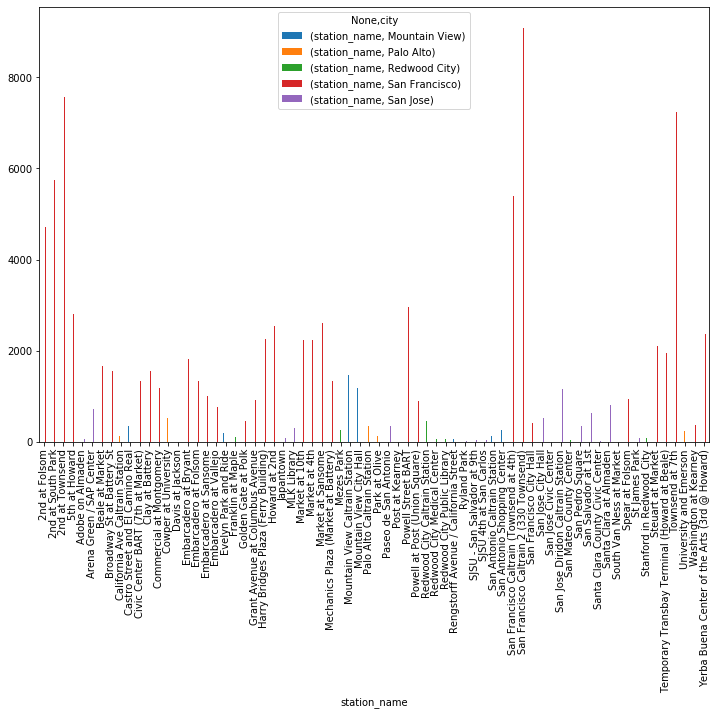

In [0]:
station_by_city.sort_values().plot(kind='bar',figsize=(12,8))

## Trip duration dependency on weather condition

* there is significant variation of trips duration
* most of the rents was at 15-25 celciuse

In [0]:
df_duration_weather['mean_temperature_c_bins'] = pd.cut(x= df_duration_weather['mean_temperature_c'], bins= 3, labels= ['0-15', '16-25', '26-70'], duplicates = 'drop')
df_duration_weather.head()


In [0]:
#df_all['mean_temperature_c_bins'] = pd.cut(x= df_all['mean_temperature_c'], bins= 3, labels= ['0-15', '16-25', '26-70'], duplicates = 'drop')

df_all.groupby('duration')['mean_temperature_c'].mean()


duration
0 days 00:01:00    17.277778
0 days 00:02:00    15.401235
0 days 00:03:00    15.365591
0 days 00:04:00    15.935754
0 days 00:05:00    15.740365
                     ...    
2 days 18:27:00    20.000000
3 days 16:58:00    21.666667
4 days 01:22:00    21.666667
7 days 04:13:00    10.000000
8 days 09:20:00    12.777778
Name: mean_temperature_c, Length: 499, dtype: float64

In [0]:
df_all['mean_temperature_c_bins'] = pd.cut(x= df_all['mean_temperature_c'], bins= 3, labels= ['0-15', '16-25', '26-50'], duplicates = 'drop')

df_all.groupby('mean_temperature_c_bins')['mean_temperature_c', 'duration'].mean()


,mean_temperature_c
mean_temperature_c_bins,
0-15,10.156127
16-25,16.006469
26-50,21.584419


In [0]:
temp_dur = df_all.loc[:, ['mean_temperature_c_bins' , 'duration']]



temp_dur.groupby('mean_temperature_c_bins').hist()



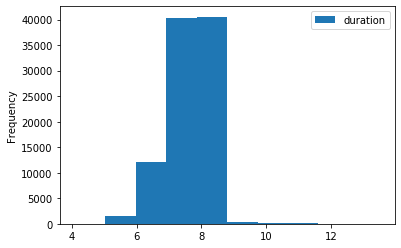

In [0]:
temp_dur = df_all.loc[:, ['mean_temperature_c_bins' , 'duration']]
temp_dur = df_all.loc[:, ['mean_temperature_c_bins' , 'duration']]
temp_dur["duration"] = temp_dur["duration"].dt.total_seconds()


temp_dur.sort_values(by='duration').hist(by='mean_temperature_c_bins', column= 'duration', figsize=(10,10))
plt.ylim((0, 10000))


In [0]:

temp_dur["duration"]
#temp_dur.groupby("mean_temperature_c_bins").mean().plot.bar()

0        724800.0
1        619980.0
2        350520.0
3        320280.0
4        239220.0
           ...   
95294        60.0
95295        60.0
95296        60.0
95297        60.0
95298        60.0
Name: duration, Length: 95299, dtype: float64

In [0]:
temp_dur.groupby("mean_temperature_c_bins").describe()

duration               ...                 
                           count         mean  ...     75%      max
mean_temperature_c_bins                        ...                 
0-15                     10152.0  2534.905437  ...  3180.0  86160.0
16-25                    74646.0  2421.499076  ...  3240.0  86340.0
26-50                    10490.0  2506.632984  ...  3240.0  80880.0

[3 rows x 8 columns]

In [0]:
df_all.groupby("mean_temperature_c_bins").describe()

id                 ... dock_count      
                           count           mean  ...        75%   max
mean_temperature_c_bins                          ...                 
0-15                     10152.0  400456.035461  ...       23.0  27.0
16-25                    74646.0  474839.543057  ...       23.0  27.0
26-50                    10490.0  549661.631840  ...       23.0  27.0

[3 rows x 144 columns]

## Popular Bike Type brand & color

* most trips use type X, where the popular brand is X and Santa Cruz


In [0]:
df_group_bike_trips=df_all.groupby(['bike_type','bike_brand']).agg({'start_date':'count'})
df_group_bike_trips.head()
df_group_bike_trips.unstack(-1).plot(kind='bar', figsize=(12, 6), subplots=False)


df_all.describe()

#add bike type depend on temperture